In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
#1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
#   keep all customers who have done transactions with us and select the join type accordingly.

In [21]:
cust = pd.read_csv("C:/python_casestudies/Pandas Case Study1_Retail Case Study/Customer.csv")
tran = pd.read_csv("C:/python_casestudies/Pandas Case Study1_Retail Case Study/Transactions.csv")
prod = pd.read_csv("C:/python_casestudies/Pandas Case Study1_Retail Case Study/prod_cat_info.csv")
merging = pd.merge(left = cust, right = tran, how = 'inner', left_on = 'customer_Id', right_on = 'cust_id')
Customer_Final = pd.merge(left = merging, right = prod, how = 'inner', left_on = ("prod_cat_code","prod_subcat_code"), right_on = ("prod_cat_code", "prod_sub_cat_code"))
Customer_Final.head()


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [22]:
# dropping duplicate rows
Customer_Final.drop_duplicates(inplace=True)
Customer_Final.duplicated().sum()

0

In [23]:
Customer_Final.isna().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [24]:
Customer_Final.dropna(axis = 0,how = 'all',inplace = True)
Customer_Final.isna().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [7]:
#2. Prepare a summary report for the merged data set.

In [25]:
# a. Get the column names and their corresponding data types
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [26]:
# b. Top/Bottom 10 observations
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [27]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
def fn_descriptives(x):
    Q1 = x.quantile(0.25)
    median = x.quantile(0.50)
    Q3 = x.quantile(0.75)
    return pd.Series([x.min(), Q1, median, Q3, x.max()], index = ['min', 'Q1', 'median', 'Q3', 'max'])
Customer_Final.select_dtypes(['int64', 'float64']).apply(fn_descriptives)

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.00,1.0,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,1.0
Q1,268935.00,3.0,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,3.0
median,270980.50,5.0,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,5.0
Q3,273114.25,8.0,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,10.0
max,275265.00,10.0,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,12.0


In [28]:
#d. Frequency tables for all the categorical variables

pd.crosstab(index = Customer_Final.Gender, columns = "count")


col_0,count
Gender,
F,11227
M,11804


In [29]:
pd.crosstab(index = Customer_Final.Store_type, columns = 'count')

col_0,count
Store_type,
Flagship store,4575
MBR,4660
TeleShop,4501
e-Shop,9304


In [30]:
pd.crosstab(index = Customer_Final.prod_cat, columns = 'count')

col_0,count
prod_cat,
Bags,1997
Books,6066
Clothing,2960
Electronics,4895
Footwear,2996
Home and kitchen,4126


In [31]:
pd.crosstab(index = Customer_Final.prod_subcat, columns = 'count').sort_values(by = 'count', ascending = True)

col_0,count
prod_subcat,
Audio and video,952
Computers,958
Academic,966
Personal Appliances,970
Cameras,985
DIY,989
Non-Fiction,1003
Furnishing,1007
Bath,1022


In [15]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables.

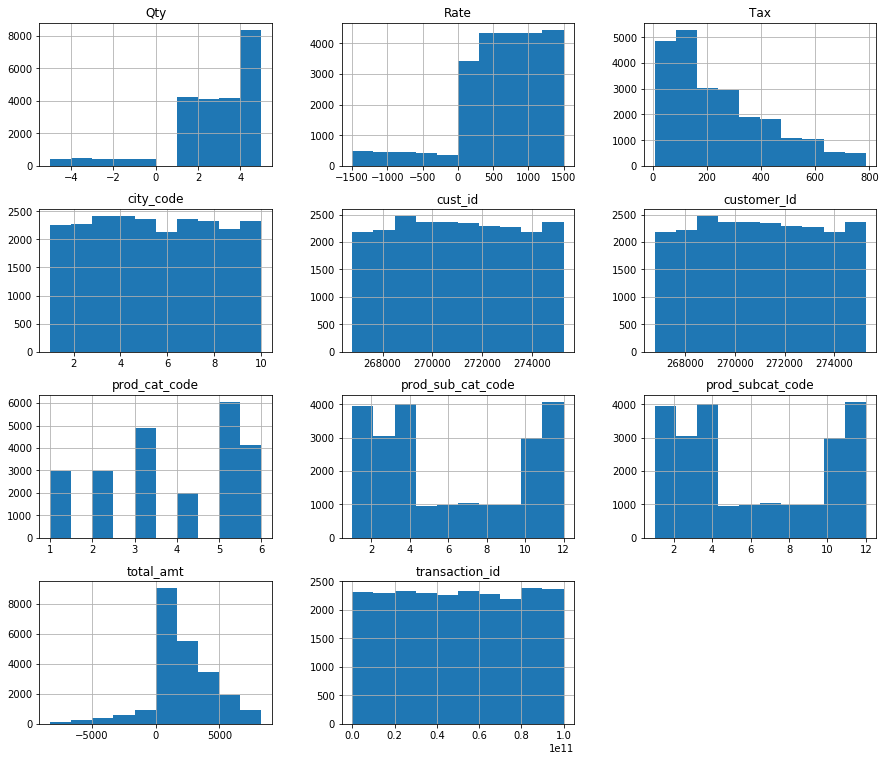

In [32]:
#  ***************  histograms for all continuous variables  ********************

Customer_Final.hist(figsize=(15,30),layout=(9,3))
plt.show()

In [35]:
#  *******************  frequency bars for categorical variables  **********************

object_dtypes = Customer_Final.select_dtypes('object')
object_dtypes.drop(columns = ['DOB', 'tran_date'], inplace = True)
#def fn_countplot(x):
#    plt.figure(figsize=(20,10))
#    sns.countplot(x)
#    plt.show()
#object_dtypes.select_dtypes('object').apply(fn_countplot)

C:\Users\JASHWANTH\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


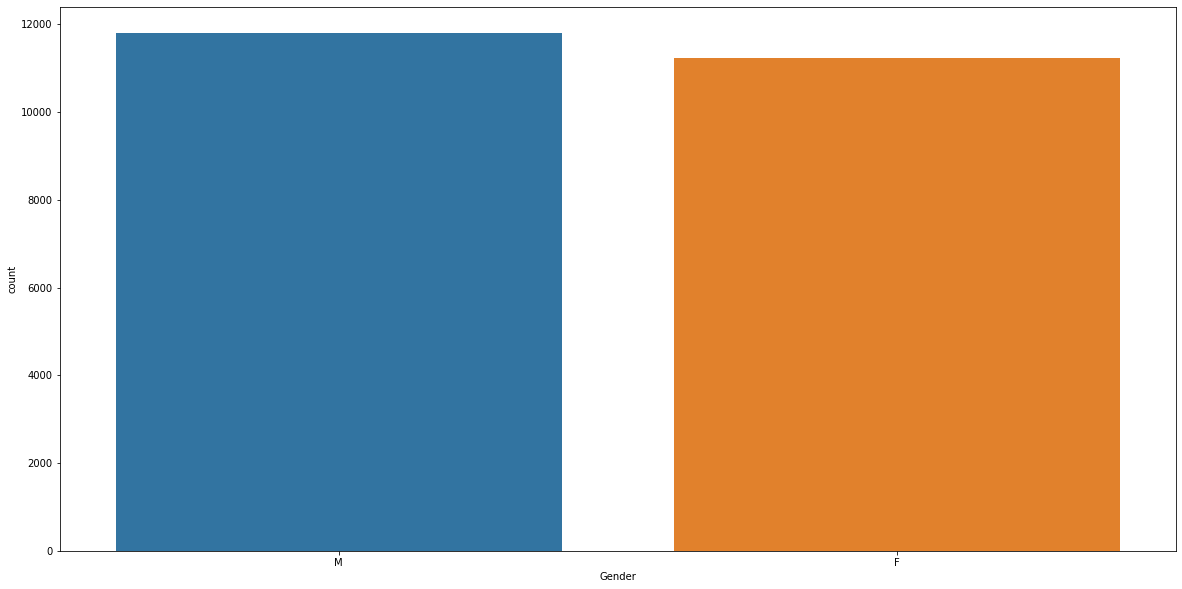

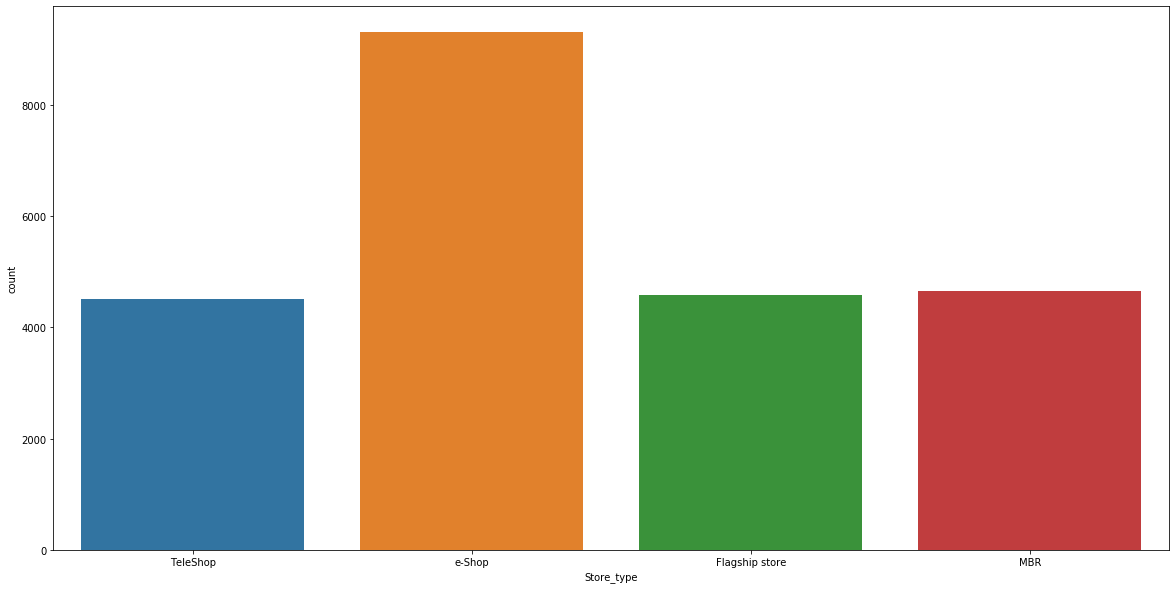

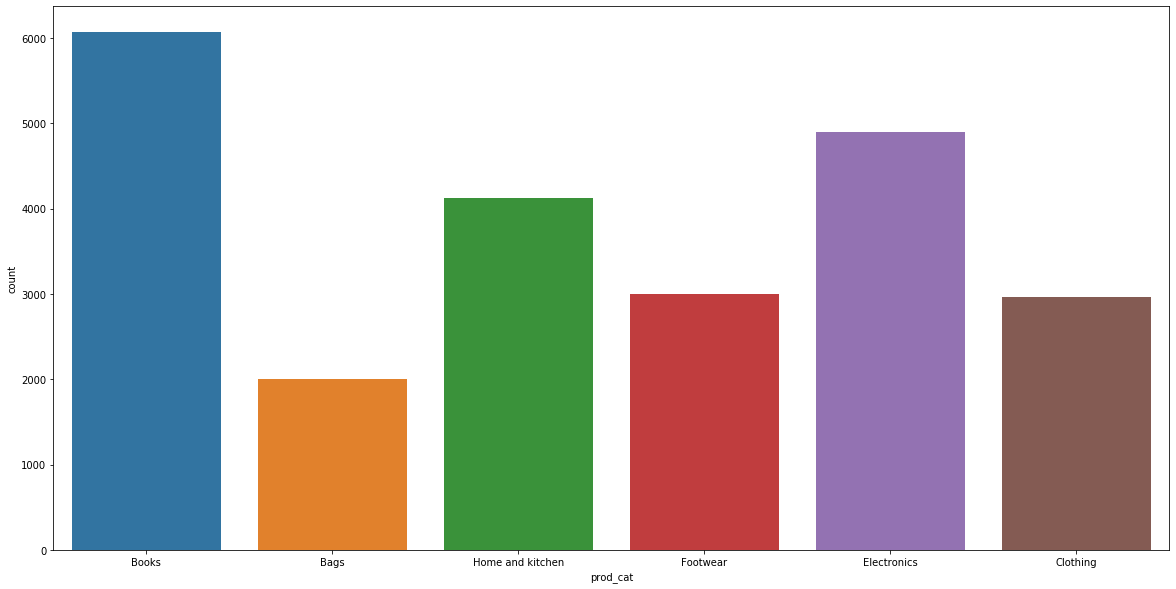

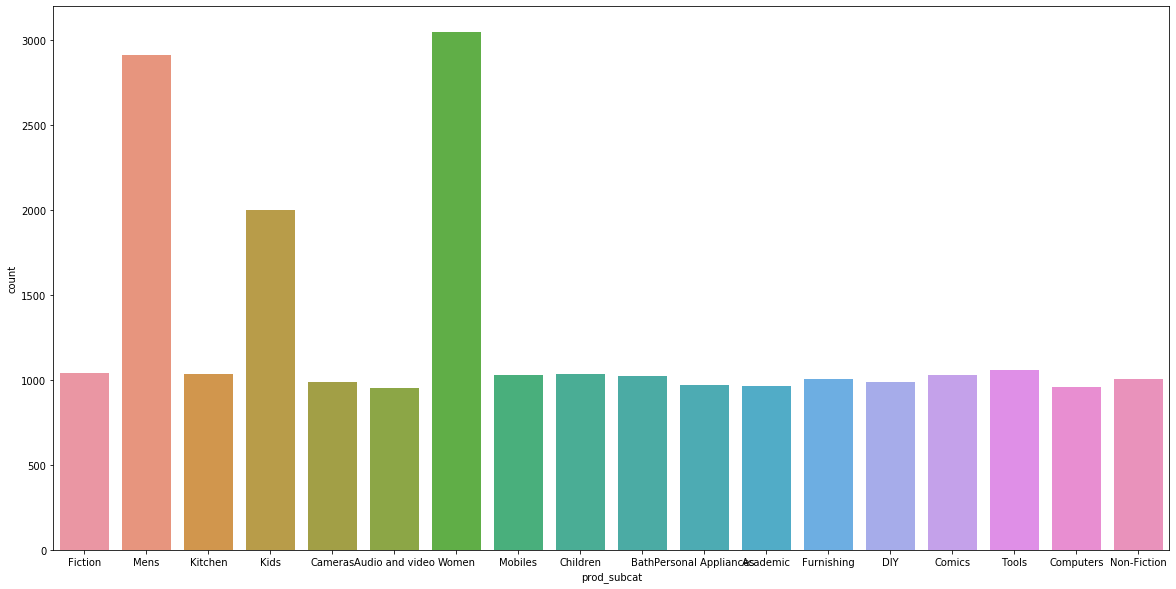

Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [36]:
def fn_countplot(x):
    plt.figure(figsize=(20,10))
    sns.countplot(x)
    plt.show()
object_dtypes.select_dtypes('object').apply(fn_countplot)

In [ ]:
#4. Calculate the following information using the merged dataset :

In [64]:
#a. Time period of the available transaction data

#coverting the dob and tran_date to datetime function 
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format = '%d-%m-%Y')

Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [65]:
#now sort the values on basis of tran_date in order to find the max and min date. 
Customer_Final.sort_values(by = 'tran_date')

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
14962,269958,1992-07-04,M,3.0,83849473598,269958,2011-01-02,12,5,3,403,126.945,1335.945,e-Shop,Books,12,Academic
16794,274222,1988-01-21,M,3.0,81365620177,274222,2011-01-02,3,2,3,373,117.495,1236.495,e-Shop,Footwear,3,Women
5678,272122,1984-11-05,M,4.0,14744074495,272122,2011-01-02,1,2,5,475,249.375,2624.375,TeleShop,Footwear,1,Mens
1082,275166,1970-11-05,M,10.0,31795262740,275166,2011-01-02,1,4,4,531,223.020,2347.020,e-Shop,Bags,1,Mens
2801,268624,1986-09-18,F,1.0,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,10,Kitchen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20675,273322,1983-06-10,F,1.0,89214951500,273322,2014-12-02,12,6,1,1166,122.430,1288.430,TeleShop,Home and kitchen,12,Tools
15002,275246,1970-06-25,M,3.0,36792372906,275246,2014-12-02,2,6,1,1185,124.425,1309.425,e-Shop,Home and kitchen,2,Furnishing
3599,269772,1981-05-25,F,9.0,33433865581,269772,2014-12-02,4,2,3,1035,326.025,3431.025,TeleShop,Footwear,4,Kids
8045,271944,1971-12-11,F,5.0,79536458466,271944,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,1,Women


In [66]:
################# print the max and min date ######################
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()
print("min date: " + pd.Timestamp.strftime(min_date,format="%d-%m-%Y") +  " to " + "max date: " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

min date: 02-01-2011 to max date: 02-12-2014


In [67]:
#print the time period of the transaction data 
time_period = pd.to_datetime(max_date) - pd.to_datetime(min_date)
print("the time period for the available transaction is ", time_period)

the time period for the available transaction is  1430 days 00:00:00


In [63]:
#b. Count of transactions where the total amount of transaction was negative


negative_transaction = Customer_Final.loc[(Customer_Final.total_amt <0),].total_amt.count()

print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2164


In [ ]:
#5. Analyze which product categories are more popular among females vs male customers.

Customer_Final.pivot_table(index = 'Gender', columns = 'prod_cat', values = 'Qty', aggfunc = 'sum')

In [ ]:
#6. Which City code has the maximum customers and what was the percentage of customers from that city?

cnt_citycode = Customer_Final.groupby('city_code').city_code.agg(cnt = 'count').sort_values(by = 'cnt', ascending = False)
cnt_citycode

In [ ]:
################# percentage of customers from that city #########################

percentage = round(cnt_citycode.cnt / cnt_citycode.cnt.sum() *100,2)
perc_city_cust = pd.merge(left = cnt_citycode, right = percentage, how ='outer', left_on = 'city_code', right_on = 'city_code')
perc_city_cust.columns = ['count', 'percentage']
per_city_cust = perc_city_cust.reset_index()
per_city_cust

In [ ]:
#Therefore the city code the maximum custumers is 
per_city_cust.iloc[0]

In [ ]:
#7. Which store type sells the maximum products by value and by quantity?

Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by = 'Qty', ascending = False)

In [ ]:
#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

Customer_Final.loc[(Customer_Final.prod_cat.isin(['Electronics', 'Clothing']) & (Customer_Final.Store_type == 'Flagship store'))].groupby('prod_cat')['total_amt'].sum()

In [ ]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?

Customer_Final.loc[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')].total_amt.sum()

In [ ]:
#10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

pos_trans = Customer_Final.loc[Customer_Final["total_amt"]>0,:]

# creating a dataframe that contains unique transactions 
unique_trans = pos_trans.groupby('customer_Id',as_index = False).total_amt.count().sort_values(by = 'total_amt', ascending = False).reset_index(drop = True)
unique_trans

In [ ]:
# now finding the customers which have unique transactions greater than 10
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

In [ ]:
unique_trans.loc[(unique_trans['total_amt'] > 10),:]

In [ ]:
#11. For all customers aged between 25 - 35, find out:

In [ ]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
Customer_Final['LastTransDateByYear'] = Customer_Final.groupby(['customer_Id',Customer_Final.tran_date.dt.year])['tran_date'].transform(max)
Customer_Final

In [ ]:
#a. What was the total amount spent for “Electronics” and “Books” product categories?


Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < Customer_Final['LastTransDateByYear'], Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (Customer_Final['LastTransDateByYear'] - Customer_Final['DOB']).astype('<m8[Y]')

Customer_Final.head()

In [ ]:
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[17,24,35,45],labels=['18-24','25-35','36-44'],include_lowest=True)
Customer_Final

In [ ]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

customer_25_35

In [ ]:
customer_25_35.loc['25-35',['Books','Electronics']]

In [ ]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

In [ ]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = Customer_Final[Customer_Final['Age_cat']=='25-35']

customer_total_amount_25_35.head()

In [ ]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?

total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

total_amount

In [ ]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

In [37]:
Customer_Final.drop_duplicates?